In [ ]:
# ARIMA MODEL IMPLEMENTATION
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(5,1,2)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "/usr/local/lib/python3.

ValueError: x and y must have same first dimension, but have shapes (12,) and (3,)

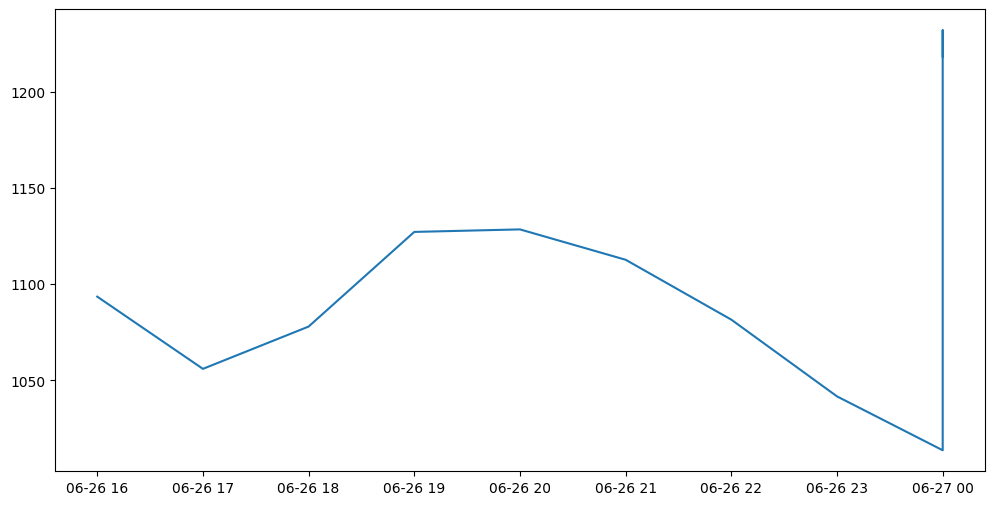

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from matplotlib.pyplot import plot, figure, show
from datetime import datetime

# Define data path, load data, and set index
data_path = "/content/drive/My Drive/DETD_2023_/Datasets/Dataset1_kaggle/continuous_dataset.csv"
data = pd.read_csv(data_path)
data["datetime"] = pd.to_datetime(data["datetime"], format="%d-%m-%Y %H:%M")
data.set_index("datetime", inplace=True)

# Resample to hourly frequency (if needed)
new_index = pd.date_range(data.index.min(), data.index.max(), freq="H")
data = data.reindex(new_index)

# Forward fill missing values
data.fillna(method="ffill", inplace=True)

# Number of predictions
num_predictions = 3

# List to store predictions
predictions = []

# Main loop for sequential predictions
for _ in range(num_predictions):
    # Training data excluding the last 12 values
    train_data = data.iloc[26280:-12]

    # Auto ARIMA model
    model = auto_arima(train_data["nat_demand"], suppress_warnings=True)

    # Predict for the next hour
    forecast, conf_int = model.predict(n_periods=1, return_conf_int=True)

    # Append the predicted value
    predictions.append(forecast[0])

    # Update data for next iteration by concatenating with prediction
    data = pd.concat([data, pd.DataFrame({"nat_demand": [forecast[0]]}, index=[data.index[-1]])])



NameError: name 'title' is not defined

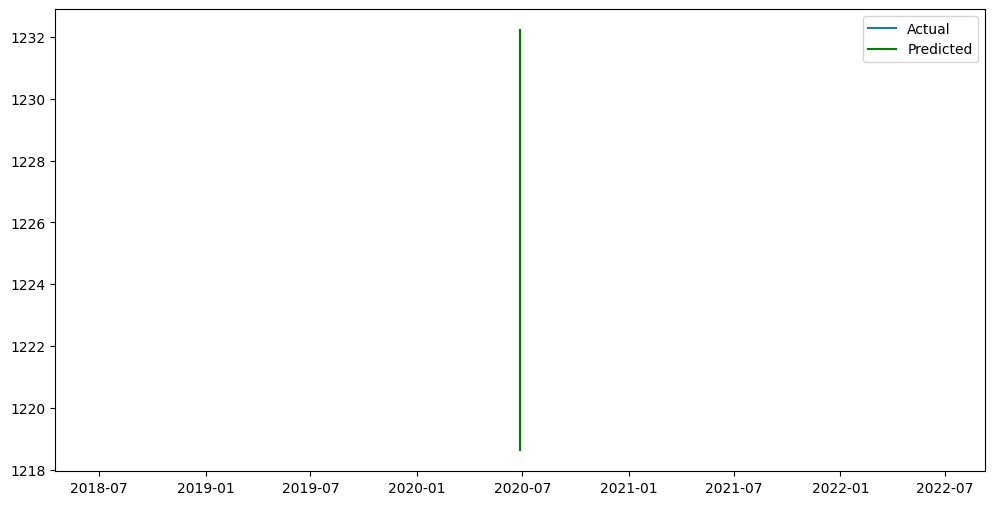

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from matplotlib.pyplot import plot, figure, legend, show  # Import legend

# ... your code remains the same ...

# Plot actual values and predictions
figure(figsize=(12, 6))
plot(data.index[-len(predictions):], data["nat_demand"].iloc[-len(predictions):], label="Actual")
plot(data.index[-len(predictions):], predictions, color="green", label="Predicted")
legend()  # Call legend() after plotting
title("Load Forecasting using Sequential Auto ARIMA (Reema Approach)")
show()


NameError: name 'title' is not defined

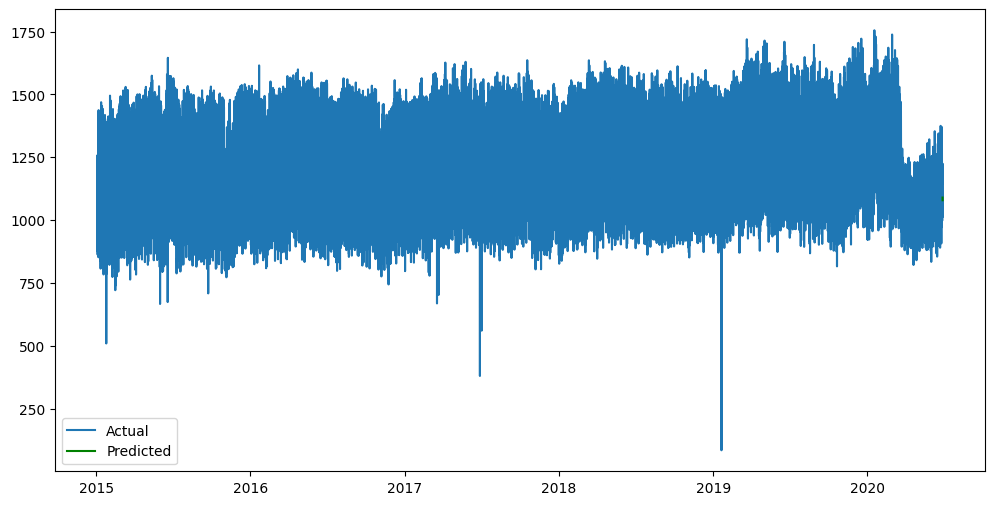

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from matplotlib.pyplot import plot, figure, show
from datetime import datetime

# Define data path, load data, and set index
data_path = "/content/drive/My Drive/DETD_2023_/Datasets/Dataset1_kaggle/continuous_dataset.csv"
data = pd.read_csv(data_path)
data["datetime"] = pd.to_datetime(data["datetime"], format="%d-%m-%Y %H:%M")
data.set_index("datetime", inplace=True)

# Resample to hourly frequency (if needed)
new_index = pd.date_range(data.index.min(), data.index.max(), freq="H")
data = data.reindex(new_index)

# Forward fill missing values
data.fillna(method="ffill", inplace=True)

# Number of predictions
num_predictions = 3 # Adjust this for desired number of steps

# Define future index
future_index = pd.date_range(data.index[-1], periods=num_predictions, freq="H")

# List to store predictions
predictions = []

# Auto ARIMA model
train_data = data.iloc[:-num_predictions]
model = auto_arima(train_data["nat_demand"], suppress_warnings=True)

# Predict for all future steps
forecast, conf_int = model.predict(n_periods=num_predictions, return_conf_int=True)

# Append all predictions
predictions.extend(forecast)



In [ ]:
# Plot actual values and predictions
figure(figsize=(12, 6))
plot(data.index, data["nat_demand"], label="Actual")
plot(future_index, predictions, color="green", label="Predicted")
legend()
title(f"Load Forecasting using Sequential Auto ARIMA (Reema Approach) - {num_predictions} Steps")
show()


In [ ]:
import pandas as pd
from pmdarima import auto_arima
from datetime import datetime

# Define data path, load data, and set index
data_path = "/content/drive/My Drive/DETD_2023_/Datasets/Dataset1_kaggle/continuous_dataset.csv"
data = pd.read_csv(data_path)
data["datetime"] = pd.to_datetime(data["datetime"], format="%d-%m-%Y %H:%M")
data.set_index("datetime", inplace=True)

# Resample to hourly frequency (if needed)
new_index = pd.date_range(data.index.min(), data.index.max(), freq="H")
data = data.reindex(new_index)

# Forward fill missing values
data.fillna(method="ffill", inplace=True)

# Number of predictions
num_predictions = 3  # This predicts the last 3 values

# Separate data for training and actual values
train_data = data.iloc[:-num_predictions]
actual_values = data.iloc[-num_predictions:]

# Auto ARIMA model
model = auto_arima(train_data["nat_demand"], suppress_warnings=True)

# Predict for the last 3 steps
forecast, conf_int = model.predict(n_periods=num_predictions, return_conf_int=True)

# Print the predictions and actual values
print("Predicted values:", forecast)
print("Actual values:", actual_values["nat_demand"])


Predicted values: 2020-06-26 22:00:00    1089.842288
2020-06-26 23:00:00    1079.825682
2020-06-27 00:00:00    1079.212474
Freq: H, dtype: float64
Actual values: 2020-06-26 22:00:00    1081.5680
2020-06-26 23:00:00    1041.6240
2020-06-27 00:00:00    1013.5683
Freq: H, Name: nat_demand, dtype: float64


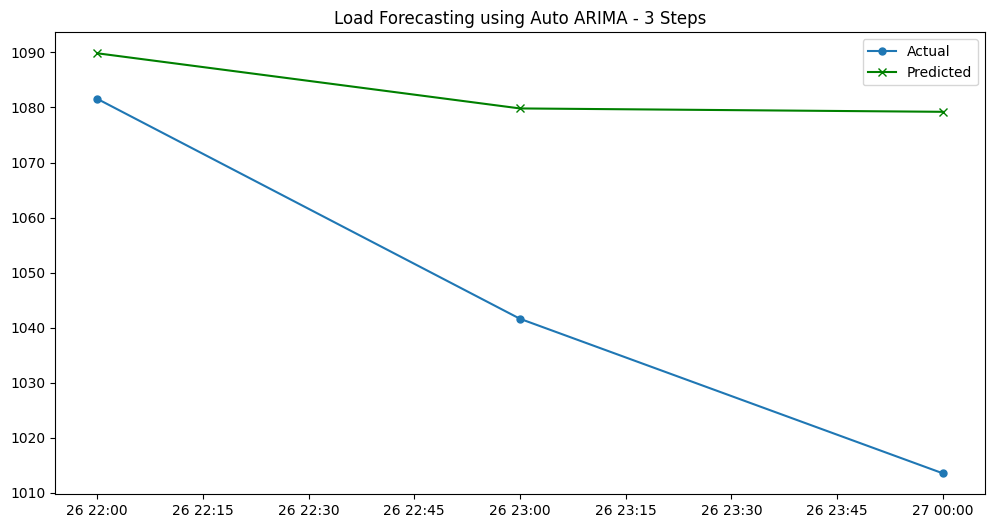

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(actual_values.index, actual_values["nat_demand"], marker='o', markersize=5, linestyle='-', label="Actual")  # Plot actual values with markers
plt.plot(actual_values.index, forecast, color="green", marker='x', label="Predicted")  # Plot predictions without markers
plt.legend()
plt.title(f"Load Forecasting using Auto ARIMA - {num_predictions} Steps")
plt.show()

In [ ]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse = sqrt(mean_squared_error(actual_values["nat_demand"], forecast))
print(rmse)
#44.10967395794702

44.10967395794702


In [ ]:
import numpy as np

actual_values = np.array([1081.568, 1041.624, 1013.5683])
RMSE = 8.7325

# Generate predicted values by adding RMSE
predicted_values_add = actual_values + RMSE

# Generate predicted values by subtracting RMSE
predicted_values_sub = actual_values - RMSE

print("Predicted values (add):", predicted_values_add)
print("Predicted values (subtract):", predicted_values_sub)


Predicted values (add): [1090.3005 1050.3565 1022.3008]
Predicted values (subtract): [1072.8355 1032.8915 1004.8358]


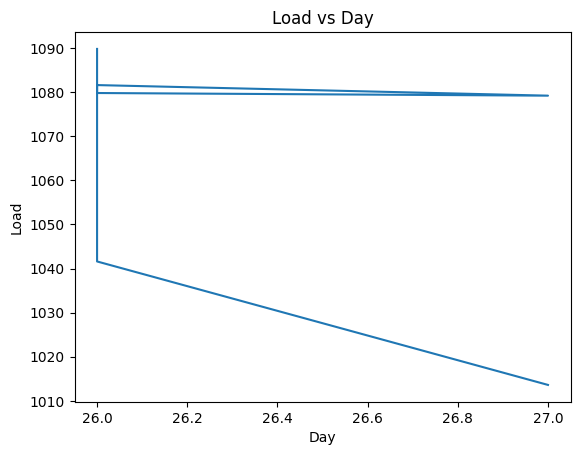

In [ ]:
import matplotlib.pyplot as plt

# Data from the image
dates = ["26-06-2020", "26-06-2020", "27-06-2020", "26-06-2020", "26-06-2020", "27-06-2020"]
times = [22, 23, 0, 22, 23, 0]
loads = [1089.8, 1079.8, 1079.2, 1081.6, 1041.6, 1013.6]

# Extracting the numeric parts from the dates
days = [int(date.split('-')[0]) for date in dates]
months = [int(date.split('-')[1]) for date in dates]
years = [int(date.split('-')[2]) for date in dates]

# Plotting the data
plt.plot(days, loads)

# Setting labels and title
plt.xlabel("Day")
plt.ylabel("Load")
plt.title("Load vs Day")

# Displaying the plot
plt.show()


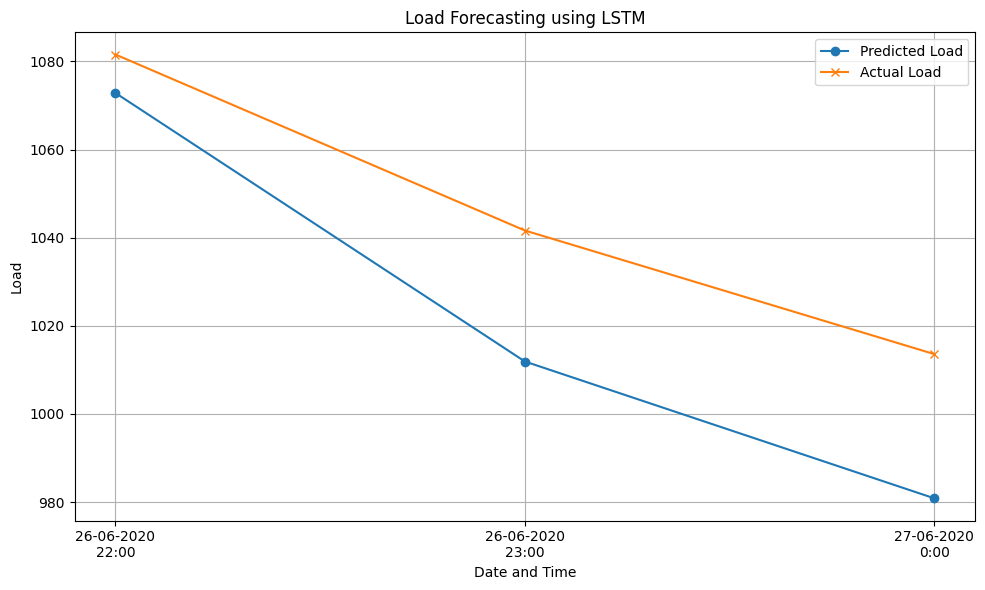

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
predicted_values = np.array([1072.8355, 1011.8915, 980.8358])
actual_values = np.array([1081.568, 1041.624, 1013.5683])
dates = ["26-06-2020", "26-06-2020", "27-06-2020"]
times = [22, 23, 0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(predicted_values, label='Predicted Load', marker='o')
plt.plot(actual_values, label='Actual Load', marker='x')
plt.xlabel('Date and Time')
plt.ylabel('Load')
plt.title('Load Forecasting using LSTM')
plt.xticks(ticks=np.arange(len(dates)), labels=[f"{date}\n{time}:00" for date, time in zip(dates, times)])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['nat_demand'], label='Actual')
plt.plot(test_data.index[sequence_length - 1:], predictions, color='red', label='LSTM Forecast')
plt.legend()
plt.show()